#Сверточные нейронные сети

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np

In [12]:
# Загрузка данных
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Нормализация
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encoding меток
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)


In [13]:
model = models.Sequential([
    # Первый сверточный блок
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Второй сверточный блок
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Полносвязный слой
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])


/home/daniil/study/nn-course/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#визуализация модели
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.1)


Epoch 1/20


2025-10-03 18:51:59.150144: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 552960000 exceeds 10% of free system memory.


704/704 ━━━━━━━━━━━━━━━━━━━━ 91s 126ms/step - accuracy: 0.1169 - loss: 4.1244 - val_accuracy: 0.1628 - val_loss: 3.6052
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.2391 - loss: 3.1598 - val_accuracy: 0.3056 - val_loss: 2.7971
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 87s 124ms/step - accuracy: 0.3145 - loss: 2.7292 - val_accuracy: 0.3572 - val_loss: 2.5668
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 86s 123ms/step - accuracy: 0.3635 - loss: 2.4949 - val_accuracy: 0.3692 - val_loss: 2.4451
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 87s 123ms/step - accuracy: 0.3906 - loss: 2.3470 - val_accuracy: 0.3942 - val_loss: 2.3746
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 86s 122ms/step - accuracy: 0.4160 - loss: 2.2170 - val_accuracy: 0.4322 - val_loss: 2.1616
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.4388 - loss: 2.1207 - val_accuracy: 0.4466 - val_loss: 2.1436
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 78s 110ms/step - accuracy: 0.4568 - loss: 2.0307 - val

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точность на тестовых данных: {test_acc:.4f}')

ValueError: You must call `compile()` before using the model.

#Задание 1
1. Добавить код с визуализацией графиков по точности и ошибки на основание данных из истории.
2. Добавить код по использованию обученной модели (predict) для стороннего изображения.

NameError: name 'history' is not defined

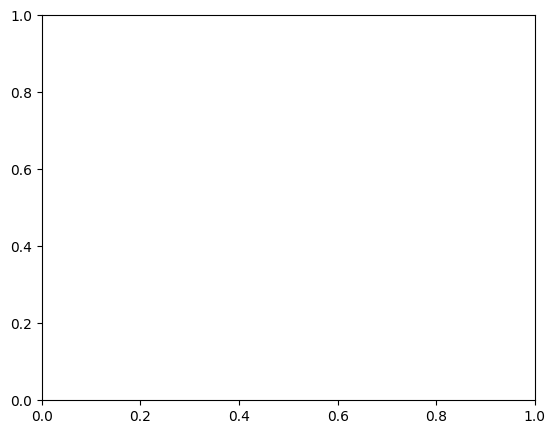

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Ошибка на обучении')
plt.plot(history.history['val_loss'], label='Ошибка на валидации')
plt.title('Ошибка модели')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Задание 2
img_path = "/home/daniil/study/nn-course/notebooks/number.png"
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.axis("off")
plt.show()

# Преобразуем картинку в формат для модели
x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)  # batch size = 1

# Делаем предсказание
pred = model.predict(x)
pred_class = np.argmax(pred, axis=1)[0]

print("Предсказанный класс:", pred_class)


#Задание 2
1. Усложнить архитектуру модели, добавив еще один сверточный блок

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
2. Обучить измененную модель и сравнить результаты с предыдущей моделью
3. Попробовать изменит размеры ядер сначала сделать 7 на 7, потом 5 на 5, потом 3 на 3. Проанализировать на что это повлияет.

In [ ]:
model = models.Sequential([
    # Первый сверточный блок
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Второй сверточный блок
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Полносвязный слой
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

def build_model(size=(3,3)):
    model = models.Sequential([
    # Первый сверточный блок
    layers.Conv2D(32, size, activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, size, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Второй сверточный блок
    layers.Conv2D(64, size, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, size, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, size, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, size, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Полносвязный слой
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])
    
model1 = build_model(size=(7, 7))